In [1]:
import simulation
import numpy as np
from scipy.stats import rayleigh

L = 50.0
M = 3

r_values = np.arange(0, 5.01, 0.01)

# 2D standard normal distribution radial density
# The radial distribution for a 2D normal is proportional to Rayleigh distribution with scale 1 (standard normal case)
def density(r):
    return (1 / (2 * np.pi)) * np.exp(-0.5 * r**2)

radial_density_values = density(r_values)
q_values = np.arange(0, 1.0, 0.001)
inverse_radial_values = rayleigh.ppf(q_values, scale=1.0)
g2 = simulation.PyGrid2(
    M=M,
    areaLen=[L, L],
    cellCount=[L, L],
    isPeriodic=True,
    birthRates=[1]*M,
    deathRates=[0]*M,
    ddMatrix=[0.1, 0.2, 0.1,
              0.1, 0.1, 0.2,
              0.2, 0.1, 0.1, ],         # 1x1 for single species
    birthX=[q_values.tolist()]*M,     # example
    birthY=[inverse_radial_values.tolist()]*M,
    deathX_=[ [ r_values.tolist()]*M]*M,
    deathY_=[ [ radial_density_values.tolist() ]*M ]*M,
    cutoffs=[5.0]*M*M,
    seed=42,
    rtimeLimit=7200.0
)


# Parameters
N = 1000  # Number of [x, y] pairs per group

# Generate the list
coordinates = []
for _ in range(M):
    group = [[np.random.uniform(0, L), np.random.uniform(0, L)] for _ in range(N)]
    coordinates.append(group)

g2.placePopulation(coordinates)

print("Birth rate:", g2.total_birth_rate)
print("Death rate:", g2.total_death_rate)

Birth rate: 3000.0
Death rate: 482.2392821800854


In [2]:
import pandas as pd

data = list()

for t in range(300):
    for c in range(g2.get_num_cells()):
        for n in range(M):
            coords = g2.get_cell_coords(c,n)
            for i in range(len(coords)):
                x,y = coords[i]
                data.append([t,x,y,n])
    g2.run_for(1)
    print(t, g2.total_population)

0 6345
1 10999
2 14788
3 17211
4 18508
5 18785
6 19210
7 19175
8 19236
9 19493
10 19591
11 19618
12 19333
13 19473
14 19682
15 19724
16 19881
17 20166
18 19999
19 20007
20 20354
21 20352
22 20367
23 20332
24 20512
25 20602
26 20748
27 20998
28 20987
29 21132
30 21039
31 21394
32 21387
33 21615
34 21449
35 21516
36 21614
37 21734
38 21713
39 22059
40 22213
41 22302
42 22067
43 22369
44 22418
45 22839
46 22677
47 22996
48 23046
49 23228
50 23079
51 23114
52 23206
53 23177
54 23355
55 23177
56 22977
57 22949
58 22880
59 22633
60 22555
61 22753
62 22783
63 22560
64 22899
65 22725
66 22887
67 22927
68 22865
69 23107
70 22925
71 22886
72 22597
73 22468
74 22726
75 22993
76 23070
77 23062
78 23111
79 23179
80 22964
81 23017
82 23130
83 23210
84 23087
85 23065
86 22858
87 23105
88 23110
89 22890
90 22953
91 23116
92 22837
93 22777
94 22969
95 22825
96 22818
97 22868
98 22869
99 22792
100 22654
101 22685
102 22844
103 22952
104 22938
105 22756
106 22566
107 22596
108 22726
109 22982
110 22851
1

In [6]:
df = pd.DataFrame(columns=['time','x','y','s'],data=data)
df

,time,x,y,s
0,0,1.353776,0.314411,2
1,0,2.543493,0.297069,1
2,0,3.051433,0.601791,2
3,0,4.044533,0.723264,1
4,0,5.025156,0.758682,2
...,...,...,...,...
6645655,299,48.406906,49.380410,1
6645656,299,49.030189,49.139143,0
6645657,299,49.878421,49.462942,0
6645658,299,49.687616,49.004568,1


In [7]:
from matplotlib import animation
movie_writer = animation.FFMpegWriter(fps=2, codec='h264', extra_args=['-vcodec', 'libx264'])

Animation saved as points_animation_cyclic.mp4


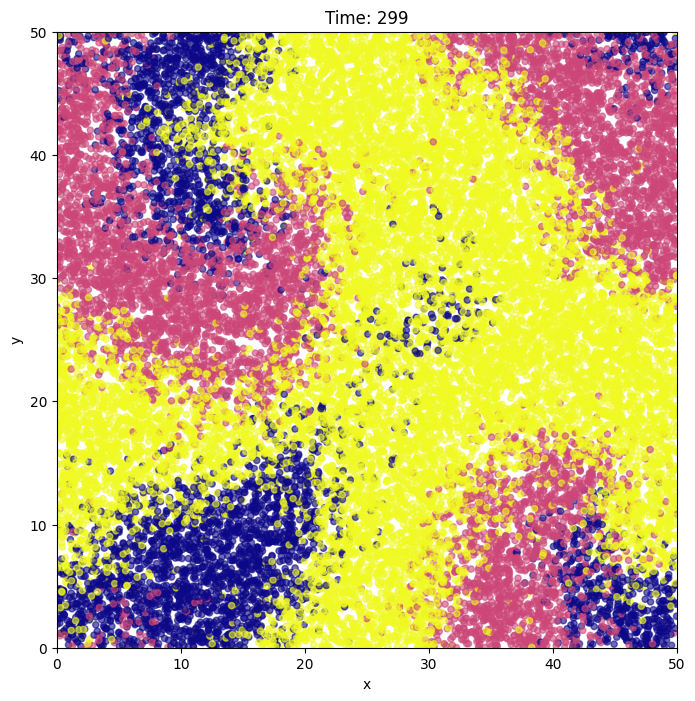

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib
matplotlib.rcParams['animation.ffmpeg_path'] = 'C:/Users/radia/ffmpeg/bin/ffmpeg'

df = df.sort_values('time')

# Parameters
output_file = "points_animation_cyclic.mp4"

# MP4 Video Generation
fig, ax = plt.subplots(figsize=(8, 8))

# Set axis limits
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_xlabel('x')
ax.set_ylabel('y')
sc = ax.scatter([], [], c=[], cmap='plasma', s=20, alpha=0.6)

# Animation function
def update(frame):
    current_df = df[df['time'] == frame]
    sc.set_offsets(current_df[['x', 'y']].values)
    sc.set_array(current_df['s'].values)
    ax.set_title(f"Time: {frame}")
    return sc,

ani = FuncAnimation(fig, update, frames=df['time'].nunique(), blit=True)

# Save as MP4
ani.save(output_file, writer=movie_writer)
print(f"Animation saved as {output_file}")